In [1]:
from google.colab import files
uploaded = files.upload()

Saving Titanic-Dataset.csv to Titanic-Dataset.csv


In [2]:
import pandas as pd
df = pd.read_csv("Titanic-Dataset.csv")
df.head()
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [3]:
df.drop('Cabin', axis=1, inplace=True, errors='ignore')
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

/tmp/ipython-input-3-3930246736.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)


In [4]:
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df['Sex'].fillna(0, inplace=True)
df.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True, errors='ignore')
df.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True, errors='ignore')

/tmp/ipython-input-4-2157549928.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Sex'].fillna(0, inplace=True)


In [8]:
# df.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)
df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)
X = df.drop(['Survived'], axis=1)
y = df['Survived']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print(" Accuracy:", accuracy_score(y_test, y_pred))
print("\n Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\n Classification Report:\n", classification_report(y_test, y_pred))

 Accuracy: 0.8100558659217877

 Confusion Matrix:
 [[90 15]
 [19 55]]

 Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.86      0.84       105
           1       0.79      0.74      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



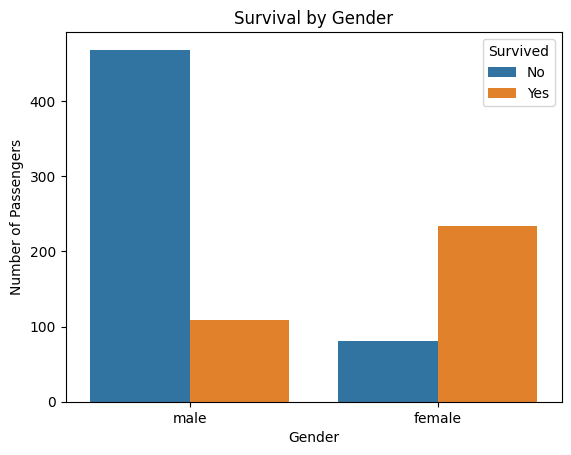

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

df_plot = df.copy()
df_plot['Sex'] = df_plot['Sex'].map({0: 'male', 1: 'female'})
sns.countplot(x='Sex', hue='Survived', data=df_plot)
plt.title("Survival by Gender")
plt.xlabel("Gender")
plt.ylabel("Number of Passengers")
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()